# Converting Jsons to Zipped GeoJsons

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import _utils

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_1117/2096858892.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling 

In [2]:
import json

In [3]:
import re 

import ast

In [4]:
import gcsfs
import os

### Read in Json

In [3]:
# error reading due to len of arrays not matching
# line = json.load("us101_cc_bike.json")
with open("us101_cc_bike.json", "r") as file:
    line = json.load(file)
    

In [4]:
line

{'description': 'do not use for analyses',
 'name': ' US101CCCR_BikeTrail_Location_only',
 'allowedModes': ['BICYCLE', 'WALK'],
 'bikeTimeFactor': 1,
 'bikeLts': 1,
 'carSpeedKph': 30,
 'lineStrings': [[[-119.20599, 34.250277], [-119.196317, 34.251772]],
  [[-119.196948, 34.251643],
   [-119.195589, 34.251858],
   [-119.194615, 34.25208],
   [-119.193859, 34.252327],
   [-119.193069, 34.25265],
   [-119.192468, 34.25296],
   [-119.192388, 34.253005],
   [-119.1916, 34.253455],
   [-119.190431, 34.254183],
   [-119.189196, 34.254962],
   [-119.187524, 34.255969],
   [-119.185058, 34.257473]],
  [[-119.185329, 34.257272],
   [-119.182834, 34.258829],
   [-119.180142, 34.260506],
   [-119.177185, 34.262288]],
  [[-119.177373, 34.262152],
   [-119.176, 34.263],
   [-119.173854, 34.264333],
   [-119.173536, 34.26451],
   [-119.172733, 34.265006]],
  [[-119.172865, 34.264891],
   [-119.171317, 34.265883],
   [-119.170109, 34.266607],
   [-119.169344, 34.267059],
   [-119.167152, 34.268394]],

In [5]:
keys_you_dont_want = {'description','name', 'allowedModes',
                      'bikeTimeFactor', 'bikeLts', 'carSpeedKph', 'walkTimeFactor'}

In [6]:
for key in keys_you_dont_want:
    line.pop(key)

In [7]:
line['coordinates'] = line.pop('lineStrings')

In [8]:
line

{'coordinates': [[[-119.20599, 34.250277], [-119.196317, 34.251772]],
  [[-119.196948, 34.251643],
   [-119.195589, 34.251858],
   [-119.194615, 34.25208],
   [-119.193859, 34.252327],
   [-119.193069, 34.25265],
   [-119.192468, 34.25296],
   [-119.192388, 34.253005],
   [-119.1916, 34.253455],
   [-119.190431, 34.254183],
   [-119.189196, 34.254962],
   [-119.187524, 34.255969],
   [-119.185058, 34.257473]],
  [[-119.185329, 34.257272],
   [-119.182834, 34.258829],
   [-119.180142, 34.260506],
   [-119.177185, 34.262288]],
  [[-119.177373, 34.262152],
   [-119.176, 34.263],
   [-119.173854, 34.264333],
   [-119.173536, 34.26451],
   [-119.172733, 34.265006]],
  [[-119.172865, 34.264891],
   [-119.171317, 34.265883],
   [-119.170109, 34.266607],
   [-119.169344, 34.267059],
   [-119.167152, 34.268394]],
  [[-119.167385, 34.268291],
   [-119.166173, 34.269023],
   [-119.164632, 34.269948],
   [-119.162433, 34.27128],
   [-119.161232, 34.272059],
   [-119.159627, 34.273002],
   [-119.15

In [9]:
new_dict = {"type": "FeatureCollection"
#            , "features"[{"geometry": {"type": "MultiLineString",
#         },
#         "type": "Feature",
 
#     }]
}
# # "features": [{"geometry": {"type": "MultiLineString",'

In [10]:
new_dict

{'type': 'FeatureCollection'}

In [12]:
new_dict.update(line)

In [71]:
### way to append the values in keys to test
# keys_to_add["games"].append(['Post 3', 'post 3 description'])

In [13]:
new_dict

{'type': 'FeatureCollection',
 'coordinates': [[[-119.20599, 34.250277], [-119.196317, 34.251772]],
  [[-119.196948, 34.251643],
   [-119.195589, 34.251858],
   [-119.194615, 34.25208],
   [-119.193859, 34.252327],
   [-119.193069, 34.25265],
   [-119.192468, 34.25296],
   [-119.192388, 34.253005],
   [-119.1916, 34.253455],
   [-119.190431, 34.254183],
   [-119.189196, 34.254962],
   [-119.187524, 34.255969],
   [-119.185058, 34.257473]],
  [[-119.185329, 34.257272],
   [-119.182834, 34.258829],
   [-119.180142, 34.260506],
   [-119.177185, 34.262288]],
  [[-119.177373, 34.262152],
   [-119.176, 34.263],
   [-119.173854, 34.264333],
   [-119.173536, 34.26451],
   [-119.172733, 34.265006]],
  [[-119.172865, 34.264891],
   [-119.171317, 34.265883],
   [-119.170109, 34.266607],
   [-119.169344, 34.267059],
   [-119.167152, 34.268394]],
  [[-119.167385, 34.268291],
   [-119.166173, 34.269023],
   [-119.164632, 34.269948],
   [-119.162433, 34.27128],
   [-119.161232, 34.272059],
   [-119.1

In [10]:
#### https://docs.python.org/3/library/json.html
#### https://docs.python.org/3/tutorial/datastructures.html#dictionaries
#### https://docs.python.org/3/tutorial/inputoutput.html#tut-files

#### EB Greenway Shape file

In [ ]:
# proj_ebgreenway = gpd.read_file('eb_greenway_files/project_location_3.geojson')

In [7]:
# proj_ebgreenway

In [8]:
# ax = proj_ebgreenway.plot(color='blue')

In [10]:
# _utils.read_and_create_shpfiles('eb_greenway_files/project_location_3.geojson', "eb_greenway.zip")

In [17]:
# proj_ebgreenway.to_file('EB_Greenway_project_location.shp')  

#### Project 210 Median Shapefile

In [11]:
# proj_210median = gpd.read_file('210_files/210median.geojson')

In [12]:
# ax = proj_210median.plot(color='blue')

In [14]:
# proj_210median.to_file('proj_210median.shp')  

In [15]:
# _utils.read_and_create_shpfiles('yolo_80_50_bikepath.geojson', 'yolo80_50_bikepath')

In [16]:
# _utils.read_and_create_shpfiles('us101_cc_pedundercrossing.geojson', 'us101_cc_ped_undercrossing')

In [18]:
# test = gpd.read_file('us101_woodside.geojson')
# ax = test.plot(color='blue')

In [19]:
# _utils.read_and_create_shpfiles('us101_woodside.geojson', 'us101_woodside_locations')

In [29]:
## error to read in json
# test_json = gpd.read_file('us101_cc_bike.json')
# ax_json = test_geojson.plot(color='blue')


#### Project US 101 connected communities

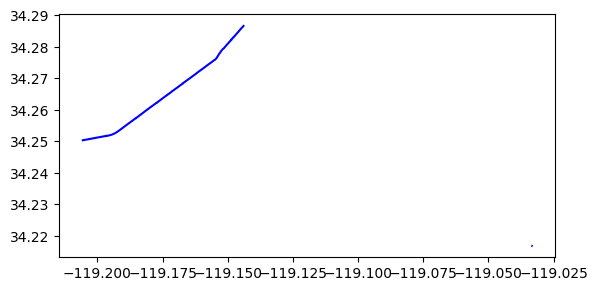

In [53]:
test_geojson = gpd.read_file('us101cc_bikeped.geojson')
ax_geojson = test_geojson.plot(color='blue')

## geojson works

In [5]:
# _utils.read_and_create_shpfiles('us101cc_bikeped.geojson', 'us101cc_bikeped_locations')

### testing way to get json to geojson without manually manipulating 


In [14]:
input_file = json.load(open("us101_cc_bike.json", "r", encoding="utf-8"))

In [15]:
(input_file)

{'description': 'do not use for analyses',
 'name': ' US101CCCR_BikeTrail_Location_only',
 'allowedModes': ['BICYCLE', 'WALK'],
 'bikeTimeFactor': 1,
 'bikeLts': 1,
 'carSpeedKph': 30,
 'lineStrings': [[[-119.20599, 34.250277], [-119.196317, 34.251772]],
  [[-119.196948, 34.251643],
   [-119.195589, 34.251858],
   [-119.194615, 34.25208],
   [-119.193859, 34.252327],
   [-119.193069, 34.25265],
   [-119.192468, 34.25296],
   [-119.192388, 34.253005],
   [-119.1916, 34.253455],
   [-119.190431, 34.254183],
   [-119.189196, 34.254962],
   [-119.187524, 34.255969],
   [-119.185058, 34.257473]],
  [[-119.185329, 34.257272],
   [-119.182834, 34.258829],
   [-119.180142, 34.260506],
   [-119.177185, 34.262288]],
  [[-119.177373, 34.262152],
   [-119.176, 34.263],
   [-119.173854, 34.264333],
   [-119.173536, 34.26451],
   [-119.172733, 34.265006]],
  [[-119.172865, 34.264891],
   [-119.171317, 34.265883],
   [-119.170109, 34.266607],
   [-119.169344, 34.267059],
   [-119.167152, 34.268394]],

### Convert to string then to geojson
attempting to convert file to text using `json.dumps`, extract the part of the json I want to keep, then add the geojson parts

In [3]:
#https://stackoverflow.com/questions/20199126/reading-json-from-a-file
import re

## help from https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary
import ast

In [17]:
text = json.dumps(input_file)

In [18]:
text

'{"description": "do not use for analyses", "name": " US101CCCR_BikeTrail_Location_only", "allowedModes": ["BICYCLE", "WALK"], "bikeTimeFactor": 1, "bikeLts": 1, "carSpeedKph": 30, "lineStrings": [[[-119.20599, 34.250277], [-119.196317, 34.251772]], [[-119.196948, 34.251643], [-119.195589, 34.251858], [-119.194615, 34.25208], [-119.193859, 34.252327], [-119.193069, 34.25265], [-119.192468, 34.25296], [-119.192388, 34.253005], [-119.1916, 34.253455], [-119.190431, 34.254183], [-119.189196, 34.254962], [-119.187524, 34.255969], [-119.185058, 34.257473]], [[-119.185329, 34.257272], [-119.182834, 34.258829], [-119.180142, 34.260506], [-119.177185, 34.262288]], [[-119.177373, 34.262152], [-119.176, 34.263], [-119.173854, 34.264333], [-119.173536, 34.26451], [-119.172733, 34.265006]], [[-119.172865, 34.264891], [-119.171317, 34.265883], [-119.170109, 34.266607], [-119.169344, 34.267059], [-119.167152, 34.268394]], [[-119.167385, 34.268291], [-119.166173, 34.269023], [-119.164632, 34.269948],

In [19]:
# my_keword1 = ", "
# text_split = text.split(my_keword1)
# text_split

In [65]:
# text2 = json.loads(json.dumps(input_file))

In [21]:
# text2

In [63]:
### using re
###https://stackoverflow.com/questions/4666973/how-to-extract-the-substring-between-two-markers

m = re.search('lineStrings": (.+?), "walkTimeFactor', text)
if m:
    found = m.group(1)

In [23]:
found

'[[[-119.20599, 34.250277], [-119.196317, 34.251772]], [[-119.196948, 34.251643], [-119.195589, 34.251858], [-119.194615, 34.25208], [-119.193859, 34.252327], [-119.193069, 34.25265], [-119.192468, 34.25296], [-119.192388, 34.253005], [-119.1916, 34.253455], [-119.190431, 34.254183], [-119.189196, 34.254962], [-119.187524, 34.255969], [-119.185058, 34.257473]], [[-119.185329, 34.257272], [-119.182834, 34.258829], [-119.180142, 34.260506], [-119.177185, 34.262288]], [[-119.177373, 34.262152], [-119.176, 34.263], [-119.173854, 34.264333], [-119.173536, 34.26451], [-119.172733, 34.265006]], [[-119.172865, 34.264891], [-119.171317, 34.265883], [-119.170109, 34.266607], [-119.169344, 34.267059], [-119.167152, 34.268394]], [[-119.167385, 34.268291], [-119.166173, 34.269023], [-119.164632, 34.269948], [-119.162433, 34.27128], [-119.161232, 34.272059], [-119.159627, 34.273002], [-119.157879, 34.274092], [-119.156145, 34.27514], [-119.155026, 34.275816]], [[-119.155166, 34.27571], [-119.154719,

In [24]:
start_text = ('{"type": "FeatureCollection", "features": [{"geometry": { "type": "MultiLineString", "coordinates":')

In [25]:
end_text = ('}, "type": "Feature", }] }')

In [26]:
new_file = start_text + found + end_text

In [38]:
new_file

'{"type": "FeatureCollection", "features": [{"geometry": { "type": "MultiLineString", "coordinates":[[[-119.20599, 34.250277], [-119.196317, 34.251772]], [[-119.196948, 34.251643], [-119.195589, 34.251858], [-119.194615, 34.25208], [-119.193859, 34.252327], [-119.193069, 34.25265], [-119.192468, 34.25296], [-119.192388, 34.253005], [-119.1916, 34.253455], [-119.190431, 34.254183], [-119.189196, 34.254962], [-119.187524, 34.255969], [-119.185058, 34.257473]], [[-119.185329, 34.257272], [-119.182834, 34.258829], [-119.180142, 34.260506], [-119.177185, 34.262288]], [[-119.177373, 34.262152], [-119.176, 34.263], [-119.173854, 34.264333], [-119.173536, 34.26451], [-119.172733, 34.265006]], [[-119.172865, 34.264891], [-119.171317, 34.265883], [-119.170109, 34.266607], [-119.169344, 34.267059], [-119.167152, 34.268394]], [[-119.167385, 34.268291], [-119.166173, 34.269023], [-119.164632, 34.269948], [-119.162433, 34.27128], [-119.161232, 34.272059], [-119.159627, 34.273002], [-119.157879, 34.2

In [50]:
## the format were looking for

In [40]:
# d = json.loads(new_file)

In [59]:
d = ast.literal_eval(new_file)

In [61]:
## can also use eval but looks like theres some hesitancy about using this
# d = eval(new_file)

In [47]:
d

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'MultiLineString',
    'coordinates': [[[-119.20599, 34.250277], [-119.196317, 34.251772]],
     [[-119.196948, 34.251643],
      [-119.195589, 34.251858],
      [-119.194615, 34.25208],
      [-119.193859, 34.252327],
      [-119.193069, 34.25265],
      [-119.192468, 34.25296],
      [-119.192388, 34.253005],
      [-119.1916, 34.253455],
      [-119.190431, 34.254183],
      [-119.189196, 34.254962],
      [-119.187524, 34.255969],
      [-119.185058, 34.257473]],
     [[-119.185329, 34.257272],
      [-119.182834, 34.258829],
      [-119.180142, 34.260506],
      [-119.177185, 34.262288]],
     [[-119.177373, 34.262152],
      [-119.176, 34.263],
      [-119.173854, 34.264333],
      [-119.173536, 34.26451],
      [-119.172733, 34.265006]],
     [[-119.172865, 34.264891],
      [-119.171317, 34.265883],
      [-119.170109, 34.266607],
      [-119.169344, 34.267059],
      [-119.167152, 34.268394]],
     [[-119.167385

In [50]:
with open("file_test.geojson", "w") as f:
        json.dump(d, f)

In [51]:
test_export  = gpd.read_file('file_test.geojson')

In [52]:
test_export

,geometry
0,"MULTILINESTRING ((-119.20599 34.25028, -119.19..."


In [64]:
# _utils.read_and_create_shpfiles('file_test.geojson', 'file_test')

Uploaded the output of this file in arcMap to check the output and it worked! 

## Test the function to get a shapefile from the json

In [5]:
_utils.json_to_shpfile('us101_cc_bike.json', 'test_us101cc', 'test_zipped_us101cc')

Path name: test_zipped_us101cc
Dirname (1st element of path): test_zipped_us101cc
Shapefile name: test_zipped_us101cc.shp
Shapefile component parts folder: test_zipped_us101cc/test_zipped_us101cc.shp


TypeError: _put() missing 1 required positional argument: 'rpath'

### Reading in Conveyal's scenario which has a geojson export option

In [26]:
scenario_geojson = gpd.read_file('CSIS-3.0 Accessibility Analysis-US101_Woodside_BikePed-new-stops.geojson')

In [27]:
scenario_geojson

,geometry


In [46]:
## empty..